# Proyecto Aurelion: Análisis de Datos de Ventas

Este notebook implementa el flujo de trabajo para el análisis de datos de ventas de la Tienda Aurelion, siguiendo el pseudocódigo y la documentación previamente definidos. El objetivo es consolidar, limpiar, analizar y visualizar los datos para extraer información de valor.

In [1]:
## PASO 1: Configuración e Importación de Librerías

# Importamos las librerías necesarias para el análisis.
# pandas: para la manipulación y análisis de datos en tablas (DataFrames).
# matplotlib.pyplot y seaborn: para la creación de gráficos y visualizaciones.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


## PASO 2: Carga de Datos

Se carga la data de archivos proporcionados, respetando la estructura definida.

In [39]:
import pandas as pd

df_clientes = pd.read_excel("clientes.xlsx")
df_productos = pd.read_excel("productos.xlsx")
df_ventas = pd.read_excel("ventas.xlsx")
df_detalle_ventas = pd.read_excel("detalle_ventas.xlsx")

print("DataFrames de BD cargados con éxito.")
#df_clientes.head(10)
#df_productos.head(2)
df_ventas.head(2)
#df_detalle_ventas.head(2)


DataFrames de BD cargados con éxito.


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr


## PASO 3: Exploración y Limpieza de Datos

En esta fase, revisamos la estructura de cada tabla, verificamos tipos de datos, buscamos valores nulos o duplicados y corregimos cualquier inconsistencia.

In [40]:
# 1. Exploración inicial
datasets = {'Clientes': df_clientes, 'Productos': df_productos, 'Ventas': df_ventas, 'Detalle Venta': df_detalle_ventas}

for name, df in datasets.items():
    print(f"--- Información de la tabla: {name} ---")
    df.info()
    print("\n")



--- Información de la tabla: Clientes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      100 non-null    int64         
 1   nombre_cliente  100 non-null    object        
 2   email           100 non-null    object        
 3   ciudad          100 non-null    object        
 4   fecha_alta      100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.0+ KB


--- Información de la tabla: Productos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_producto      100 non-null    int64 
 1   nombre_producto  100 non-null    object
 2   categoria        100 non-null    object
 3   precio_unitario  100 non-null    int64 
dtyp

In [41]:
print(df_ventas.columns)

Index(['id_venta', 'fecha', 'id_cliente', 'nombre_cliente', 'email',
       'medio_pago'],
      dtype='object')


In [42]:
# 2. Limpieza de columnas redundantes
# Las tablas VENTAS y DETALLE_VENTAS contienen nombres y emails que ya están en CLIENTES y PRODUCTOS.
# Es una buena práctica eliminarlas para evitar inconsistencias y trabajar solo con los IDs.
df_ventas.drop(columns=['nombre_cliente', 'email'], inplace=True)
df_detalle_ventas.drop(columns=['nombre_producto'], inplace=True)
print("Columnas redundantes eliminadas.")
df_ventas.info()
df_detalle_ventas.info()




Columnas redundantes eliminadas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_venta    120 non-null    int64         
 1   fecha       120 non-null    datetime64[ns]
 2   id_cliente  120 non-null    int64         
 3   medio_pago  120 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id_venta         343 non-null    int64
 1   id_producto      343 non-null    int64
 2   cantidad         343 non-null    int64
 3   precio_unitario  343 non-null    int64
 4   importe          343 non-null    int64
dtypes: int64(5)
memory usage: 13.5 KB


In [43]:
# 3. Verificación de nulos y duplicados (en nuestros datos de ejemplo no habrá)
print("\nConteo de valores nulos por tabla:")
for name, df in datasets.items():
    print(f"{name}: {df.isnull().sum().sum()} nulos")



Conteo de valores nulos por tabla:
Clientes: 0 nulos
Productos: 0 nulos
Ventas: 0 nulos
Detalle Venta: 0 nulos


In [50]:
# 4. Conversión de tipos de datos 
df_clientes['fecha_alta'] = pd.to_datetime(df_clientes['fecha_alta'])
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])
print("\nTipos de datos de las columnas de fecha verificados.")


Tipos de datos de las columnas de fecha verificados.


In [58]:
print("Columnas en df_ventas:", df_ventas.columns)


Columnas en df_ventas: Index(['id_venta', 'fecha', 'id_cliente', 'medio_pago'], dtype='object')


## PASO 4: Unión de Tablas (Merge / Join)

Unificamos todas las tablas en un único DataFrame maestro para facilitar el análisis cruzado. La secuencia de unión es clave para construir la vista 360°.

In [62]:
# 1. Unir Detalle de Venta con Productos para obtener la categoría y el precio maestro
df_ventas_detalle_prod = pd.merge(df_detalle_ventas, df_productos, left_on='id_producto', right_on='id_producto')

# 2. Unir el resultado con la tabla de Ventas para obtener la fecha y el cliente de cada ítem vendido
df_completo = pd.merge(df_ventas, df_ventas_detalle_prod, on='id_venta')

# 3. Finalmente, unir con la tabla de Clientes para obtener los datos demográficos del comprador
# Ojo: los nombres de las columnas ID son distintos ('id_cliente' vs 'id_Cli')
df_master = pd.merge(df_completo, df_clientes, left_on='id_cliente', right_on='id_cliente')

print("Tabla maestra creada. Contiene toda la información consolidada.")
df_master.info()
df_master.head()

Tabla maestra creada. Contiene toda la información consolidada.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_venta           343 non-null    int64         
 1   fecha              343 non-null    datetime64[ns]
 2   id_cliente         343 non-null    int64         
 3   medio_pago         343 non-null    object        
 4   id_producto        343 non-null    int64         
 5   cantidad           343 non-null    int64         
 6   precio_unitario_x  343 non-null    int64         
 7   importe            343 non-null    int64         
 8   nombre_producto    343 non-null    object        
 9   categoria          343 non-null    object        
 10  precio_unitario_y  343 non-null    int64         
 11  nombre_cliente     343 non-null    object        
 12  email              343 non-null    object        
 13  c

,id_venta,fecha,id_cliente,medio_pago,id_producto,cantidad,precio_unitario_x,importe,nombre_producto,categoria,precio_unitario_y,nombre_cliente,email,ciudad,fecha_alta
0,1,2024-06-19,62,tarjeta,90,1,2902,2902,Toallas Húmedas x50,Limpieza,2902,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,2024-03-17,49,qr,82,5,2394,11970,Aceitunas Negras 200g,Limpieza,2394,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,2024-03-17,49,qr,39,5,469,2345,Helado Vainilla 1L,Alimentos,469,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,2024-03-17,49,qr,70,2,4061,8122,Fernet 750ml,Limpieza,4061,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,2024-03-17,49,qr,22,1,2069,2069,Medialunas de Manteca,Limpieza,2069,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


## PASO 5: Ingeniería de Características (Feature Engineering)

Creamos nuevas columnas a partir de las existentes para enriquecer el análisis. En este caso, extraeremos componentes de la fecha de venta.

In [63]:
# Extraer año, mes y día de la semana de la fecha de la venta
df_master['AnioVenta'] = df_master['fecha'].dt.year
df_master['MesVenta'] = df_master['fecha'].dt.month
df_master['DiaSemanaVenta'] = df_master['fecha'].dt.day_name()

print("Nuevas columnas de fecha creadas.")
df_master[['fecha', 'AnioVenta', 'MesVenta', 'DiaSemanaVenta']].head()

Nuevas columnas de fecha creadas.


,fecha,AnioVenta,MesVenta,DiaSemanaVenta
0,2024-06-19,2024,6,Wednesday
1,2024-03-17,2024,3,Sunday
2,2024-03-17,2024,3,Sunday
3,2024-03-17,2024,3,Sunday
4,2024-03-17,2024,3,Sunday


## PASO 6: Análisis de Datos (Responder Preguntas de Negocio)

Con la tabla maestra lista, procedemos a realizar los cálculos y agregaciones para responder a las preguntas clave.

In [68]:
### Pregunta 1: ¿Cuáles son los 5 productos más vendidos en cantidad?
top_productos_cantidad = df_master.groupby('nombre_producto')['cantidad'].sum().sort_values(ascending=False).head(5)
print("--- Top 5 Productos por Cantidad Vendida ---")
print(top_productos_cantidad)
print("\n")

### Pregunta 2: ¿Cuáles son las 5 categorías que generan más ingresos?
ventas_por_categoria = df_master.groupby('categoria')['importe'].sum().sort_values(ascending=False).head(5)
print("--- Top 5 Categorías por Ingresos Totales ---")
print(ventas_por_categoria)
print("\n")

### Pregunta 3: ¿Quiénes son los 5 clientes que más han gastado?
top_clientes_gasto = df_master.groupby('nombre_cliente')['importe'].sum().sort_values(ascending=False).head(5)
print("--- Top 5 Clientes por Gasto Total ---")
print(top_clientes_gasto)
print("\n")

### Pregunta 4: ¿Cómo se distribuyen las ventas por ciudad?
ventas_por_ciudad = df_master.groupby('ciudad')['importe'].sum().sort_values(ascending=False)
print("--- Ventas Totales por Ciudad ---")
print(ventas_por_ciudad)

--- Top 5 Productos por Cantidad Vendida ---
nombre_producto
Salsa de Tomate 500g          27
Queso Rallado 150g            26
Hamburguesas Congeladas x4    24
Vino Blanco 750ml             22
Aceitunas Verdes 200g         22
Name: cantidad, dtype: int64


--- Top 5 Categorías por Ingresos Totales ---
categoria
Limpieza     1436281
Alimentos    1215136
Name: importe, dtype: int64


--- Top 5 Clientes por Gasto Total ---
nombre_cliente
Agustina Flores    132158
Bruno Castro       118790
Bruno Diaz          90701
Diego Diaz          90522
Karina Castro       81830
Name: importe, dtype: int64


--- Ventas Totales por Ciudad ---
ciudad
Rio Cuarto     792203
Alta Gracia    481504
Cordoba        481482
Carlos Paz     353852
Villa Maria    313350
Mendiolaza     229026
Name: importe, dtype: int64


## PASO 7: Visualización de Resultados

Un gráfico comunica los hallazgos de manera mucho más efectiva. Creamos visualizaciones para los resultados obtenidos en el paso anterior.(posterior en P BI)

C:\Users\KEILY\AppData\Local\Temp\ipykernel_12124\3553987225.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='viridis')
C:\Users\KEILY\AppData\Local\Temp\ipykernel_12124\3553987225.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clientes_gasto.index, y=top_clientes_gasto.values, palette='plasma')
C:\Users\KEILY\AppData\Local\Temp\ipykernel_12124\3553987225.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_ciudad.index, y=ventas_por_ciudad.valu

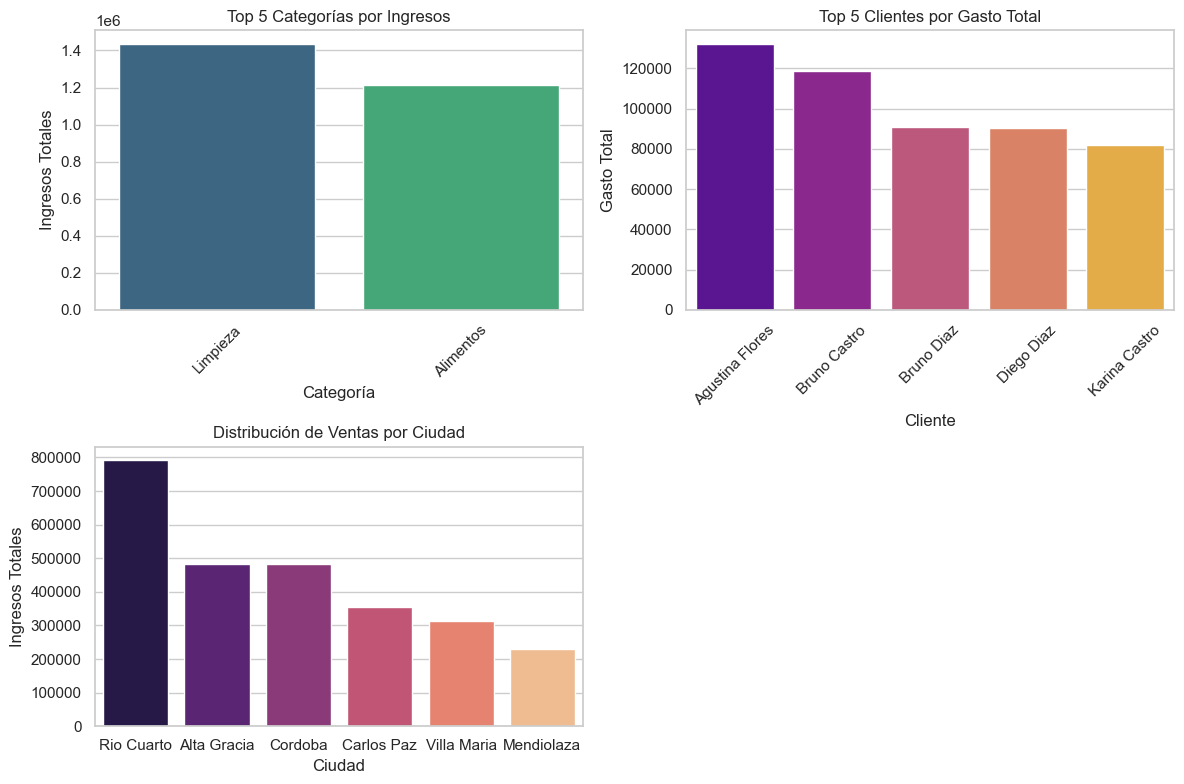

In [69]:
# Configuración general para los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Gráfico 1: Top 5 Categorías por Ingresos
plt.subplot(2, 2, 1) # (filas, columnas, índice)
sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='viridis')
plt.title('Top 5 Categorías por Ingresos')
plt.xlabel('Categoría')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)

# Gráfico 2: Top 5 Clientes por Gasto
plt.subplot(2, 2, 2)
sns.barplot(x=top_clientes_gasto.index, y=top_clientes_gasto.values, palette='plasma')
plt.title('Top 5 Clientes por Gasto Total')
plt.xlabel('Cliente')
plt.ylabel('Gasto Total')
plt.xticks(rotation=45)

# Gráfico 3: Ventas por Ciudad
plt.subplot(2, 2, 3)
sns.barplot(x=ventas_por_ciudad.index, y=ventas_por_ciudad.values, palette='magma')
plt.title('Distribución de Ventas por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Ingresos Totales')

# Ajustar el layout para que no se superpongan los títulos
plt.tight_layout()
plt.show()